# Prediction of price of automobile

In [137]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

In [138]:
df = pd.read_csv('auto.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [139]:
df.shape

(205, 26)

In [140]:
# creating headers list
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print("Headers:\n", headers)

Headers:
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [141]:
# adding headers to the dataset
df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Since the price column is our target variable. Hence, we need to drop missing values from 'price' column.

### Handling missing data

In [143]:
# droping missing values along the column "price"   
df.dropna(subset=["price"], axis=0)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [144]:
df.shape

(205, 26)

In [145]:
df.price.isnull().sum()

0

In [146]:
# replace"?" to NaN
df.replace("?", np.nan, inplace=True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [147]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

This shows number of null entries in each column. There are 7 columns contain missing data, namely - normalized-losses, num-of-doors, bore, stroke, horsepower, peak-rpm, price.

Before handling missing data, we see that few columns are not of correct type. So, we need to change their data type.

In [148]:
df[["bore", "stroke", "price", "horsepower", "peak-rpm"]] = df[["bore", "stroke", "price", "horsepower", "peak-rpm"]].astype("float", errors='ignore')
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int", errors='ignore')

In [149]:
data = ['bore','stroke', 'horsepower', 'peak-rpm', 'normalized-losses']
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df[data])
df[data] = imp.transform(df[data])
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [150]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [151]:
# to calculate the most common type automatically
df['num-of-doors'].value_counts().idxmax()

'four'

In [152]:
# replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [153]:
# drop all rows that do not have price data
df.dropna(subset=["price"], axis=0, inplace=True)
# reset index, because we dropped two rows
df.reset_index(drop=True, inplace=True)

In [154]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [155]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Now, we finally obtain the cleaned dataset with no missing values and all data in its proper format.

### Normalizing the data

In [156]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [157]:
from sklearn.preprocessing import scale
df['length'] = scale(df['length'])
df['width'] = scale(df['width'])
df['height'] = scale(df['height'])

In [158]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,2.010000e+02,2.010000e+02,2.010000e+02,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,-1.414015e-16,7.754991e-16,2.573950e-16,2555.666667,126.875622,3.330692,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,1.002497e+00,1.002497e+00,1.002497e+00,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,-2.693002e+00,-2.666233e+00,-2.443627e+00,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,-6.021238e-01,-8.534602e-01,-7.235321e-01,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,-8.143809e-02,-1.855967e-01,1.365155e-01,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,7.565404e-01,3.391531e-01,7.098805e-01,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,2.757926e+00,2.915198e+00,2.470930e+00,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


Now, the data is fully cleaned for analysis.

## Exploratory Data Analysis

Here we will explore what are the main characteristics which have most impact on car price?

In [159]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098267,-0.063561,-0.033956,-0.034636,0.082269


In [160]:
# Categorical values
df.select_dtypes(include='object').columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system'],
      dtype='object')

In [161]:
# numerical values
df.select_dtypes(include='number').columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

**Analyzing Individual Feature Patterns using Visualization**

CONTINUOUS NUMERICAL VARIABLES:

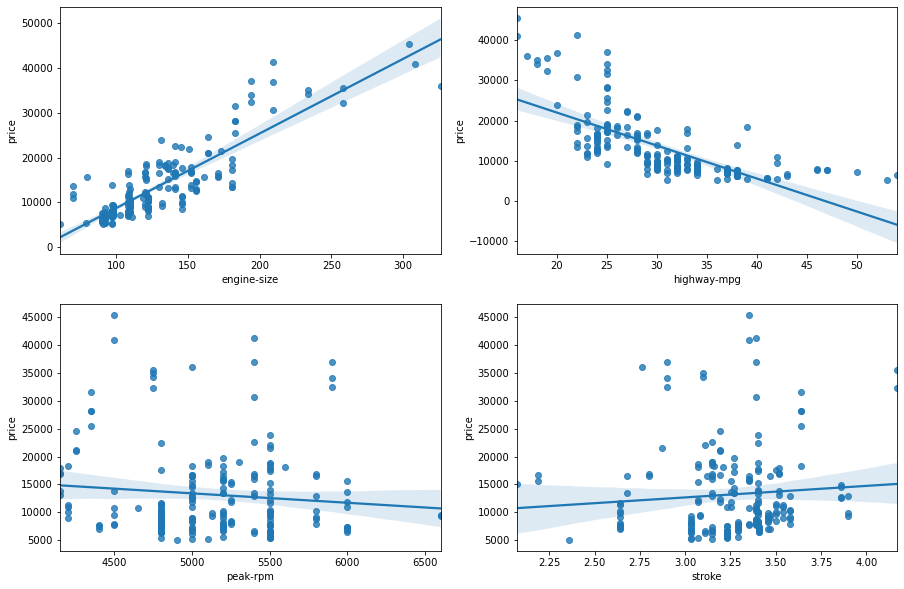

In [163]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15,10))
sns.regplot(x='engine-size', y='price', data=df, ax=axs[0, 0])
sns.regplot(x='highway-mpg', y='price', data=df, ax=axs[0, 1])
sns.regplot(x='peak-rpm',y='price', data=df, ax=axs[1, 0])
sns.regplot(x='stroke',y='price', data=df, ax=axs[1, 1])
plt.show()

As the **engine-size** goes up, the price goes up: this indicates a **positive direct correlation** between these two variables. Engine size seems like a pretty **good predictor** of price since the regression line is almost a perfect diagonal line.

As the **highway-mpg** goes up, the price goes down: this indicates an **inverse/negative relationship** between these two variables. Highway mpg could **potentially be a predictor of price**.

**Peak rpm** does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's **it is not a reliable variable.**

**Stroke** doesn't seem to be a good predictor of the price as the data points are scattered and the fitted line is close to the horizon. **It is not a reliable predictor.**

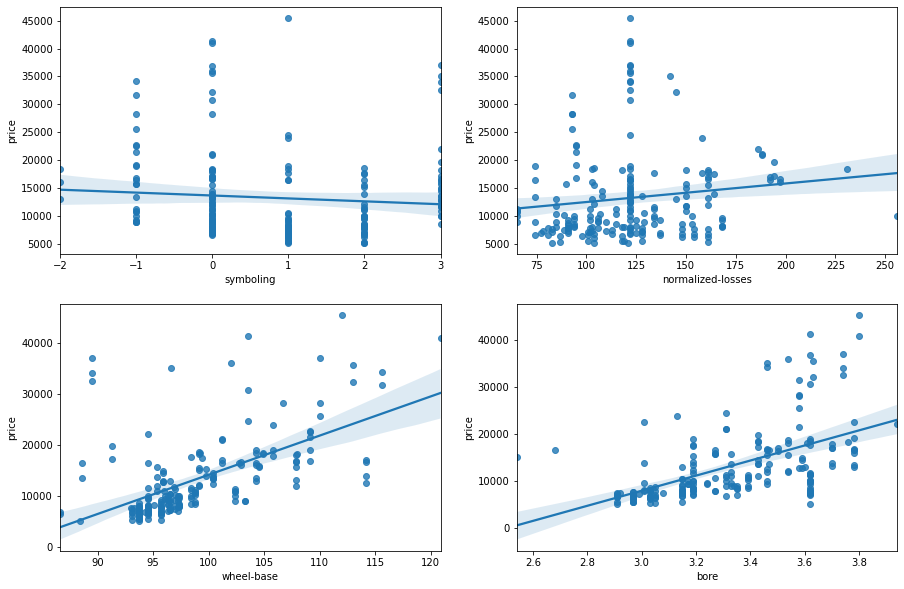

In [164]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15,10))
sns.regplot(x='symboling', y='price', data=df, ax=axs[0, 0])
sns.regplot(x='normalized-losses', y='price', data=df, ax=axs[0, 1])
sns.regplot(x='wheel-base',y='price', data=df, ax=axs[1, 0])
sns.regplot(x='bore',y='price', data=df, ax=axs[1, 1])
plt.show()

**Symboling** does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are far from the fitted line, showing lots of variability. Therefore it's **it is not a reliable variable.**

**Normalized-losses** does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's **it is not a reliable variable.**

**Wheel base** and **Bore** seem to be **good predictors** as the graph goes up as value increases. This indicates a **positive direct correlation** between these two variables.

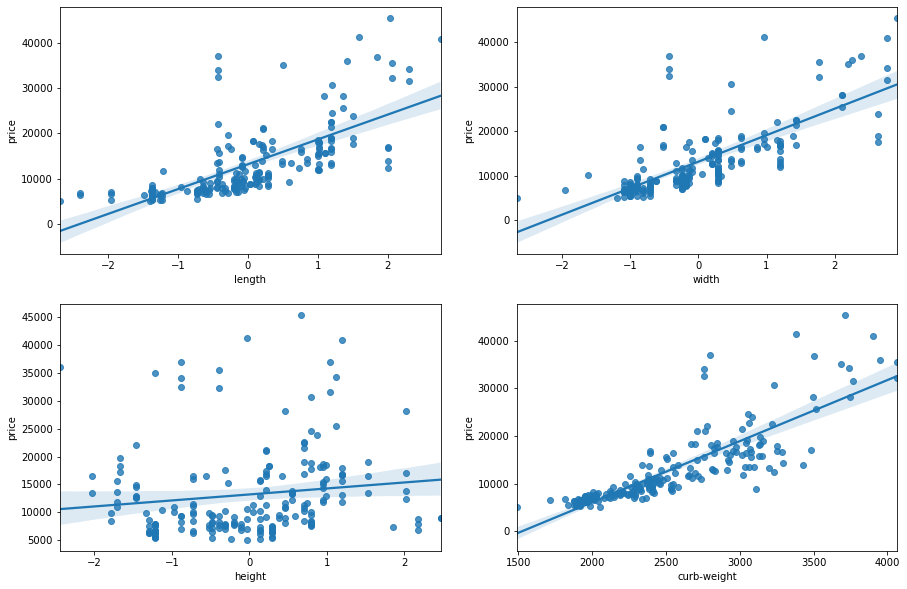

In [165]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15,10))
sns.regplot(x='length', y='price', data=df, ax=axs[0, 0])
sns.regplot(x='width', y='price', data=df, ax=axs[0, 1])
sns.regplot(x='height',y='price', data=df, ax=axs[1, 0])
sns.regplot(x='curb-weight',y='price', data=df, ax=axs[1, 1])
plt.show()

We can observe that: **length, width and curb-weight** are potential predictors while **height** cannot be considered a potential predictor as the fitted line is close to the horizon.

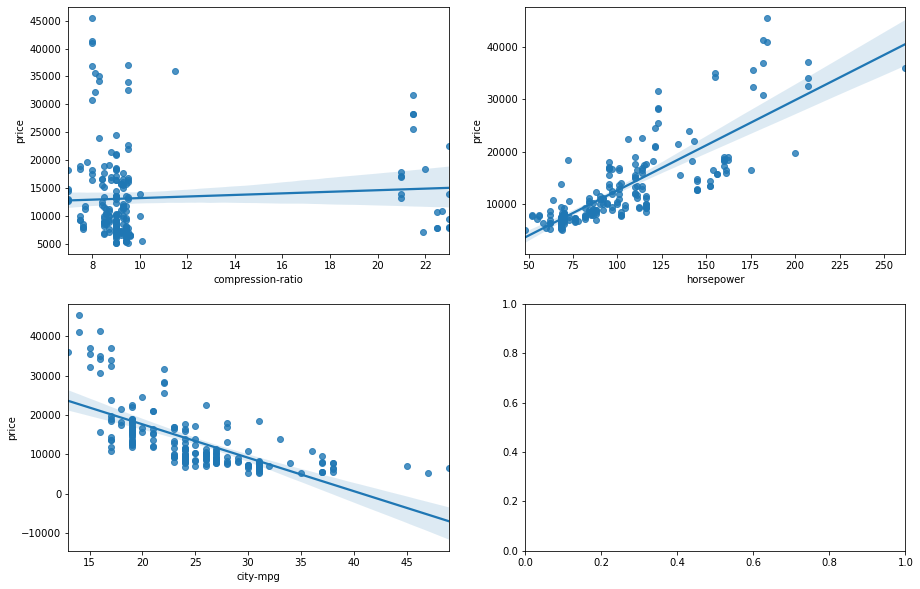

In [166]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))
sns.regplot(x='compression-ratio', y='price', data=df, ax=axs[0, 0])
sns.regplot(x='horsepower', y='price', data=df, ax=axs[0, 1])
sns.regplot(x='city-mpg', y='price', data=df, ax=axs[1, 0])
plt.show()

Here we can observe that: **horsepower and city-mpg** are potential predictors while compression ratio is not.

CATEGORICAL VARIABLES:

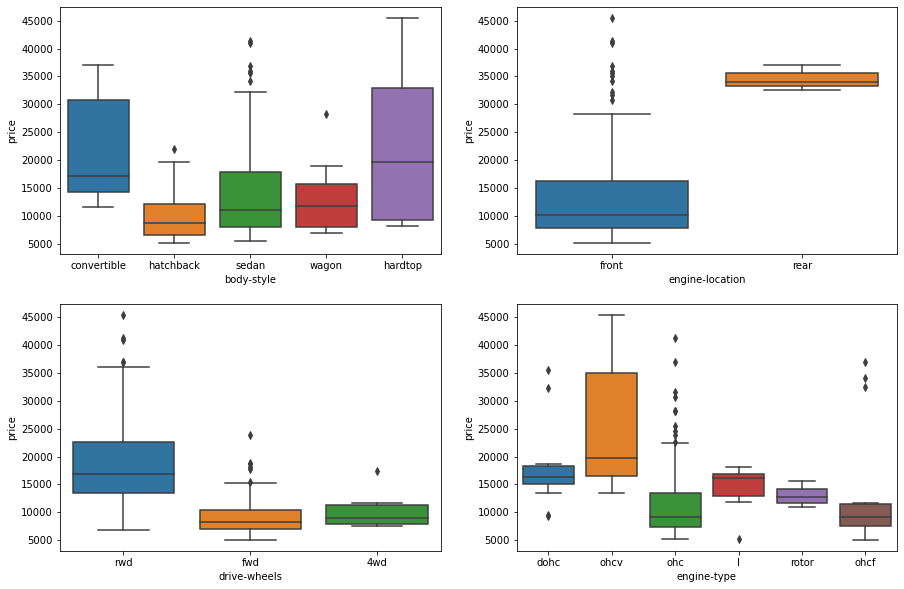

In [167]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15,10))
sns.boxplot(x='body-style', y='price', data=df, ax=axs[0, 0])
sns.boxplot(x='engine-location', y='price', data=df, ax=axs[0, 1])
sns.boxplot(x='drive-wheels',y='price', data=df, ax=axs[1, 0])
sns.boxplot(x='engine-type',y='price', data=df, ax=axs[1, 1])
plt.show()

We see that the distributions of price between the different **body-style** categories have a significant overlap, and so body-style would not be a good predictor of price.

The distribution of price between these two **engine-location** categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

The distribution of price between the different **drive-wheels** categories differs; as such drive-wheels could potentially be a predictor of price.

The distributions of price between the different **engine-type** categories have a significant overlap, and so engine-type would not be a good predictor of price.

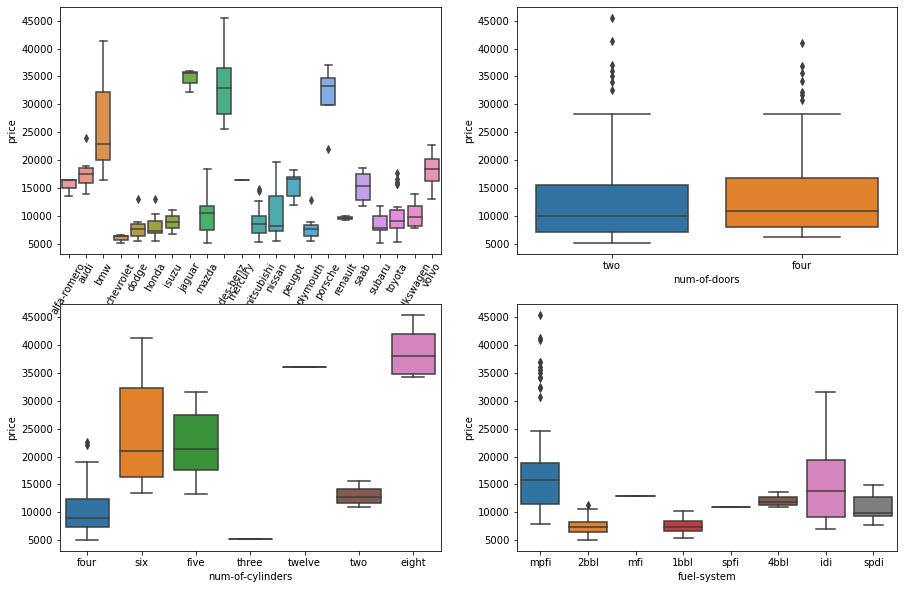

In [168]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15,10))
sns.boxplot(x='make', y='price', data=df, ax=axs[0, 0]).set_xticklabels(axs[0, 0].get_xticklabels(),rotation=60)
sns.boxplot(x='num-of-doors', y='price', data=df, ax=axs[0, 1])
sns.boxplot(x='num-of-cylinders',y='price', data=df, ax=axs[1, 0])
sns.boxplot(x='fuel-system',y='price', data=df, ax=axs[1, 1])
plt.show()

The distributions of price between the different **make** categories have a significant overlap, and so make would not be a good predictor of price.

The distributions of price between the different **num-of-doors** categories have a significant overlap, and so num-of-doors would not be a good predictor of price.

The distributions of price between the different **num-of-cylinders** categories have a significant overlap, and so num-of-cylinders would not be a good predictor of price.

The distributions of price between the different **fuel-system** categories have a significant overlap, and so fuel-system would not be a good predictor of price.

In conclusion, engine-location and drive-wheels are a good predictor. Let's confirm it.

In [169]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [170]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


Examining the value counts of the engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, this result is skewed. Thus, we are not able to draw any conclusions about the engine location. While drive weel is considered a potential predictor.

**Hence, in categorical variables only drive wheels is the potential predictor.**

In [171]:
df["drive-wheels"] = pd.get_dummies(df["drive-wheels"])
df["drive-wheels"].head()

0    0
1    0
2    0
3    0
4    1
Name: drive-wheels, dtype: uint8

### Correlation and Causation

To get a better measure of the important characteristics, we look at the correlation of these variables
with the car price, in other words: how is the car price dependent on this variable?

For this we will use **Pearson Correlation** and calculate the **P-value** which will give the probability value that the correlation between these two variables is statistically significant.

When the
* p-value is < 0.001: we say there is strong evidence that the correlation is significant.
* the p-value is < 0.05: there is moderate evidence that the correlation is significant.
* the p-value is < 0.1: there is weak evidence that the correlation is significant.
* the p-value is > 0.1: there is no evidence that the correlation is significant.

In [172]:
# Wheel base vs price
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732989e-20


Conclusion:

Since the p-value is < 0.001, the correlation between wheel-base and price is statistically significant,
although the linear relationship isn’t extremely strong (~0.585)

In [173]:
# Horsepower vs price
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.809574567003656  with a P-value of P =  6.369057428259557e-48


Conclusion:

Since the p-value is < 0.001, the correlation between horsepower and price is statistically significant,
and the linear relationship is quite strong (~0.809, close to 1)

In [174]:
# Length vs Price
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.690628380448364  with a P-value of P =  8.016477466158986e-30


Conclusion:

Since the p-value is < 0.001, the correlation between length and price is statistically significant,
and the linear relationship is moderately strong (~0.691).

In [175]:
# Width vs Price
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value )

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.200335510481646e-38


Conclusion: 

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

In [176]:
# Curb-weight vs Price
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is 0.8344145257702846  with a P-value of P =  2.1895772388936914e-53


Conclusion:

Since the p-value is < 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

In [177]:
# Bore vs Price
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value )

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =  8.049189483935489e-17


Conclusion:

Since the p-value is < 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).

In [178]:
# City-mpg vs Price
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient is -0.6865710067844677  with a P-value of P =  2.321132065567674e-29


Conclusion:

Since the p-value is < 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.

In [179]:
# Highway-mpg vs Price
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value )

The Pearson Correlation Coefficient is -0.7046922650589529  with a P-value of P =  1.7495471144477352e-31


Conclusion: 

Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.

In [180]:
# Engine-size vs Price
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


Conclusion:

Since the p-value is < 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

**Conclusion: Important Variables**

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:
* Length
* Width
* Curb-weight
* Engine-size
* Horsepower
* City-mpg
* Highway-mpg
* Wheel-base
* Bore

Categorical variables:
* Drive-wheels

## Model Development and Evaluation

### Training and Testing

In [181]:
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'length', 'width', 'city-mpg', 'wheel-base', 'bore', 'drive-wheels']].values
y = df['price'].values

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Linear Regression

In [183]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
reg_pred_test = reg.predict(X_test)

In [184]:
# prediction on training set
reg_pred_train = reg.predict(X_train)

**Test results**

In [185]:
# The mean squared error
from sklearn.metrics import mean_squared_error
print("Mean squared error: %.2f\n"
      % mean_squared_error(y_test, reg_pred_test))

Mean squared error: 22360862.43



In [186]:
# Explained variance score: 1 is perfect prediction
from sklearn.metrics import r2_score
print('Variance score: %.2f\n' % r2_score(y_test, reg_pred_test))

Variance score: 0.76



In [187]:
print('r2:',r2_score(y_test, reg_pred_test))

r2: 0.7641051665709458


**Train results**

In [188]:
# The mean squared error
print("Mean squared error: %.2f\n"
      % mean_squared_error(y_train, reg_pred_train))

Mean squared error: 7999018.42



In [189]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f\n' % r2_score(y_train, reg_pred_train))

Variance score: 0.83



In [190]:
print('r2:',r2_score(y_train, reg_pred_train))

r2: 0.833978554013873


We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement. This can be improved by using **Polynomial regression**.

### Ridge Regression

In [191]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred_test = ridge.predict(X_test)

In [192]:
# prediction on training set
ridge_pred_train = ridge.predict(X_train)

**Test results**

In [193]:
# The mean squared error
print("Mean squared error: %.2f\n"
      % mean_squared_error(y_test, ridge_pred_test))

Mean squared error: 23245484.00



In [194]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f\n' % r2_score(y_test, ridge_pred_test))

Variance score: 0.75



In [195]:
print('r2:',r2_score(y_test, ridge_pred_test))

r2: 0.7547728942583554


**Train results**

In [196]:
# The mean squared error
print("Mean squared error: %.2f\n"
      % mean_squared_error(y_train, ridge_pred_train))

Mean squared error: 8228874.47



In [197]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f\n' % r2_score(y_train, ridge_pred_train))

Variance score: 0.83



In [198]:
print('r2:',r2_score(y_train, ridge_pred_train) )

r2: 0.8292078394803561


### Lasso Regression

In [199]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred_test = lasso.predict(X_test)

In [200]:
# prediction on training set
lasso_pred_train = lasso.predict(X_train)

**Test results**

In [201]:
# The mean squared error
print("Mean squared error: %.2f\n"
      % mean_squared_error(y_test, lasso_pred_test))

Mean squared error: 22382317.30



In [202]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f\n' % r2_score(y_test, lasso_pred_test))

Variance score: 0.76



In [203]:
print('r2:',r2_score(y_test, lasso_pred_test) )

r2: 0.7638788295070844


**Train results**

In [204]:
# The mean squared error
print("Mean squared error: %.2f\n"
      % mean_squared_error(y_train, lasso_pred_train))

Mean squared error: 7999224.75



In [205]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f\n' % r2_score(y_train, lasso_pred_train))

Variance score: 0.83



In [206]:
print('r2:',r2_score(y_train, lasso_pred_train) )

r2: 0.8339742716535893
